# Random Forest Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image
import time as time

np.warnings.filterwarnings('ignore')

In [2]:
red_train_x = pd.read_csv('red_train_x.csv')
red_train_y = pd.read_csv('red_train_y.csv')
red_test_x = pd.read_csv('red_test_x.csv')
red_test_y = pd.read_csv('red_test_y.csv')

white_train_x = pd.read_csv('white_train_x.csv')
white_train_y = pd.read_csv('white_train_y.csv')
white_test_x = pd.read_csv('white_test_x.csv')
white_test_y = pd.read_csv('white_test_y.csv')

combined_train_x = pd.read_csv('combined_train_x')
combined_train_y = pd.read_csv('combined_train_y')
combined_test_x = pd.read_csv('combined_test_x')
combined_test_y = pd.read_csv('combined_test_y')

In [3]:
combined_train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,9.3,0.38,0.48,3.80,0.132,3.0,11.0,0.99577,3.23,0.57,13.20,1,0
1,5.1,0.47,0.02,1.30,0.034,18.0,44.0,0.99210,3.90,0.62,12.80,1,0
2,8.8,0.61,0.30,2.80,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,1,0
3,7.5,0.77,0.20,8.10,0.098,30.0,92.0,0.99892,3.20,0.58,9.20,1,0
4,10.0,0.32,0.59,2.20,0.077,3.0,15.0,0.99940,3.20,0.78,9.60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,5.3,0.32,0.12,6.60,0.043,22.0,141.0,0.99370,3.36,0.60,10.40,0,1
4868,6.6,0.27,0.32,1.30,0.044,18.0,93.0,0.99044,3.11,0.56,12.25,0,1
4869,6.9,0.29,0.40,19.45,0.043,36.0,156.0,0.99960,2.93,0.47,8.90,0,1
4870,6.0,0.17,0.36,1.70,0.042,14.0,61.0,0.99144,3.22,0.54,10.80,0,1


# Create Base RandomForest Models

In [3]:
#Red
base_model_red = RandomForestRegressor().fit(red_train_x, red_train_y)
y_pred = base_model_red.predict(red_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred))

RMSE: 0.6149652429202809
MAE: 0.441075


In [4]:
#Red ROUNDED
base_model_red = RandomForestRegressor().fit(red_train_x, red_train_y)
y_pred = base_model_red.predict(red_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred_rounded))

RMSE: 0.6726812023536856
MAE: 0.3725


In [5]:
#White
base_model_white = RandomForestRegressor().fit(white_train_x, white_train_y)
y_pred = base_model_white.predict(white_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred))

RMSE: 0.598838126742792
MAE: 0.4279102040816327


In [6]:
#White ROUNDED
base_model_white = RandomForestRegressor().fit(white_train_x, white_train_y)
y_pred = base_model_white.predict(white_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred_rounded))

RMSE: 0.6439672954048369
MAE: 0.34938775510204084


In [7]:
#Combined
base_model_combined = RandomForestRegressor().fit(combined_train_x, combined_train_y)
y_pred = base_model_combined.predict(combined_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred))

RMSE: 0.6125084363626224
MAE: 0.4397476923076923


In [8]:
#Combined ROUNDED
base_model_combined = RandomForestRegressor().fit(combined_train_x, combined_train_y)
y_pred = base_model_combined.predict(combined_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred_rounded))

RMSE: 0.6567987632331652
MAE: 0.36123076923076924


# Tuning Red Model

In [10]:
red_train_x.shape

(1199, 11)

In [32]:
n_samples = red_train_x.shape[0]
n_features = red_train_x.shape[1]

params = {'n_estimators': [1350],
          'max_depth': [None, 12,15,18],
          'max_leaf_nodes':[700,1000,1300],
          'max_features': list(range(2,13,2)),
          'bootstrap': [True, False]}

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(red_train_x, red_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_depth': None, 'max_features': 2, 'max_leaf_nodes': 700, 'n_estimators': 1350}


In [30]:
n_samples = red_train_x.shape[0]
n_features = red_train_x.shape[1]

params = {'n_estimators': [1350],
          'max_depth': [None, 12, 15, 18],
          'max_features': [2,3],
          'bootstrap': [True, False]}

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(red_train_x, red_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_depth': None, 'max_features': 2, 'n_estimators': 1350}


In [33]:
# Red Model with optimal parameters opto RMSE
optimal_model_red = RandomForestRegressor(n_estimators=1350, random_state=1,
                                          bootstrap = False,n_jobs=-1, max_features=2).fit(red_train_x, red_train_y)

y_pred = optimal_model_red.predict(red_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred))

RMSE: 0.6056637676560347
MAE: 0.4101314814814815


In [34]:
# Red Model with optimal parameters opto RMSE + ROUNDING                  
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred_rounded))

RMSE: 0.6557438524302001
MAE: 0.36


<AxesSubplot:xlabel='pred_y', ylabel='quality'>

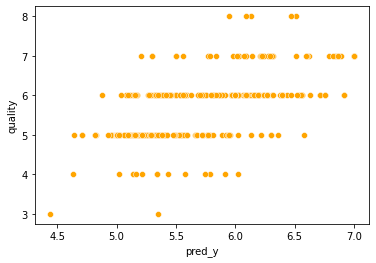

In [35]:
pred_vs_acc = pd.concat([(pd.DataFrame(y_pred, columns=["pred_y"])), red_test_y], axis = 1)
sns.scatterplot(x = 'pred_y', y = 'quality', data = pred_vs_acc, color = 'orange')

<AxesSubplot:xlabel='pred_y_rounded', ylabel='quality'>

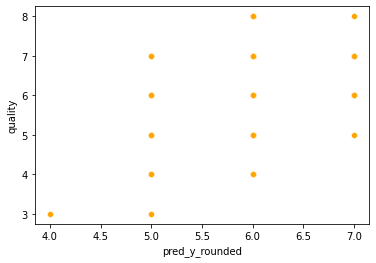

In [36]:
pred_vs_acc = pd.concat([(pd.DataFrame(y_pred_rounded, columns=["pred_y_rounded"])), red_test_y], axis = 1)
sns.scatterplot(x = 'pred_y_rounded', y = 'quality', data = pred_vs_acc, color = 'orange')

# Tuning White Model

In [38]:
n_samples = white_train_x.shape[0]
n_features = white_train_x.shape[1]

params = {'n_estimators': [1000, 1350],
          'max_features': list(range(2,8,2)),
          'max_depth': [None,15,18],
          'max_leaf_nodes':[700,1000,1300],
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(white_train_x, white_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_depth': None, 'max_features': 2, 'max_leaf_nodes': 1300, 'n_estimators': 1000}


In [42]:
n_samples = white_train_x.shape[0]
n_features = white_train_x.shape[1]

params = {'n_estimators': [1000, 1100],
          'max_features': [2],
          'max_depth': [None,18],
          'max_leaf_nodes':[1300, 1350],
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(white_train_x, white_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_depth': None, 'max_features': 2, 'max_leaf_nodes': 1300, 'n_estimators': 1000}


In [40]:
# White Model with optimal parameters
optimal_model_white = RandomForestRegressor(n_estimators=1000, random_state=1, max_features = 2, bootstrap = False, max_leaf_nodes = 1300).fit(white_train_x, white_train_y)

y_pred = optimal_model_white.predict(white_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred))

RMSE: 0.5774146259667752
MAE: 0.3856998131944779


In [41]:
# White Model with optimal parameters + ROUNDING

y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred_rounded))

RMSE: 0.6311634866964149
MAE: 0.3395918367346939


# Tuning Combined Model

In [ ]:
n_samples = combined_train_x.shape[0]
n_features = combined_train_x.shape[1]

params = {'n_estimators': [1000, 1350],
          'max_features': list(range(2,8,2)),
          'max_depth': [None,15,18],
          'max_leaf_nodes':[700,1000,1300],
          'bootstrap': [True, False]}

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(combined_train_x, combined_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

In [97]:
# Combined Model with optimal parameters
optimal_model_combined = RandomForestRegressor(n_estimators=2000, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred))

RMSE: 0.5864623422889802
MAE: 0.3872643076923077


In [99]:
n_samples = combined_train_x.shape[0]
n_features = combined_train_x.shape[1]

params = {'n_estimators': [1000, 1500, 2000, 2500],
          'max_features': [2],
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
rf_regressor_grid.fit(combined_train_x, combined_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_features': 2, 'n_estimators': 2000}


In [100]:
# Combined Model with optimal parameters
optimal_model_combined = RandomForestRegressor(n_estimators=2000, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred))

RMSE: 0.5864623422889802
MAE: 0.3872643076923077


In [101]:
# combined Model + ROUNDING
optimal_model_combined = RandomForestRegressor(n_estimators=2000, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred_rounded))

RMSE: 0.6406727233631369
MAE: 0.3476923076923077


In [227]:
# combined Model + ROUNDING + manual tune
optimal_model_combined = RandomForestRegressor(n_estimators=1100, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred_rounded))

RMSE: 0.6319688405171693
MAE: 0.3403076923076923


In [229]:
feature_importances = optimal_model_combined.feature_importances_
importances = pd.concat([pd.Series(feature_importances),
           pd.Series(combined_train_x.columns)],axis=1)
importances.sort_values(by=0,ascending = False)

,0,1
10,0.161384,alcohol
7,0.112227,density
1,0.102374,volatile acidity
4,0.089023,chlorides
5,0.083525,free sulfur dioxide
6,0.082703,total sulfur dioxide
2,0.076125,citric acid
3,0.076009,residual sugar
9,0.074895,sulphates
8,0.067951,pH


<AxesSubplot:xlabel='quality', ylabel='pred_y_rounded'>

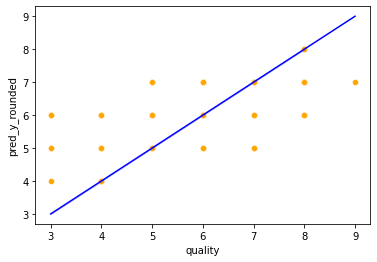

In [226]:
pred_vs_acc = pd.concat([(pd.DataFrame(y_pred_rounded, columns=["pred_y_rounded"])), combined_test_y], axis = 1)
sns.scatterplot(x = 'quality', y = 'pred_y_rounded', data = pred_vs_acc, color = 'orange')
sns.lineplot(x = 'quality', y = 'quality', data = pred_vs_acc, color = 'blue')

## Summary MAE

In [109]:
# red
print("Red Base MAE: 0.365")
print("Red Tuned MAE: 0.3675")

improvement = 100*((0.365-0.3675)/0.365)
print("Improvement:", str(round(improvement, 2)), "%")

Red Base MAE: 0.365
Red Tuned MAE: 0.3675
Improvement: -0.68 %


In [112]:
# white
print("White Base MAE: 0.3485714285714286")
print("White Tuned MAE: 0.34448979591836737")

improvement = 100*((0.3485714285714286-0.34448979591836737)/0.3485714285714286)
print("Improvement:", str(round(improvement, 2)), "%")

White Base MAE: 0.3485714285714286
White Tuned MAE: 0.34448979591836737
Improvement: 1.17 %


In [113]:
# combined
print("Combined Base MAE: 0.35323076923076924")
print("Combined Tuned MAE: 0.3476923076923077")

improvement = 100*((0.35323076923076924-0.3476923076923077)/0.35323076923076924)
print("Improvement:", str(round(improvement, 2)), "%")

Combined Base MAE: 0.35323076923076924
Combined Tuned MAE: 0.3476923076923077
Improvement: 1.57 %


# Summary RMSE

In [219]:
# red
print("Red Base RMSE: 0.6670832032063166")
print("Red Tuned RMSE: 0.6557438524302001")

improvement = 100*((0.6670832032063166-0.6557438524302001)/0.6670832032063166)
print("Improvement:", str(round(improvement, 2)), "%")

Red Base RMSE: 0.6670832032063166
Red Tuned RMSE: 0.6557438524302001
Improvement: 1.7 %


In [193]:
# white
print("White Base RMSE: 0.6356741560367711")
print("White Tuned RMSE: 0.6331005658902954")

improvement = 100*((0.6356741560367711-  0.6331005658902954)/0.6356741560367711)
print("Improvement:", str(round(improvement, 2)), "%")

White Base RMSE: 0.6356741560367711
White Tuned RMSE: 0.6331005658902954
Improvement: 0.4 %


In [162]:
# combined
print("combined Base RMSE: 0.6487858482758982")
print("Combined Tuned RMSE:  0.6319688405171693")

improvement = 100*((0.6487858482758982- 0.6319688405171693)/0.6487858482758982)
print("Improvement:", str(round(improvement, 2)), "%")

combined Base RMSE: 0.6487858482758982
Combined Tuned RMSE:  0.6319688405171693
Improvement: 2.59 %


In [238]:
#Further tuning red model with intuition + ROUNDING + manual
intuition_model_red = RandomForestRegressor(n_estimators=1350, random_state=1,
                                          bootstrap = False,n_jobs=-1, max_features=2).fit(red_train_x, red_train_y)

y_pred = intuition_model_red.predict(red_test_x)
y_red_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_red_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_red_pred_rounded))

RMSE: 0.6557438524302001
MAE: 0.36


In [239]:
# White Model with optimal parameters + ROUNDING +  manual tuning
optimal_model_white = RandomForestRegressor(n_estimators=1055, random_state=1, max_features = 2, bootstrap = False).fit(white_train_x, white_train_y)

y_pred = optimal_model_white.predict(white_test_x)
y_white_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_white_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_white_pred_rounded))

RMSE: 0.6331005658902954
MAE: 0.33877551020408164


In [244]:
y_red_pred_rounded = pd.Series(y_red_pred_rounded)
y_white_pred_rounded = pd.Series(y_white_pred_rounded)
predictions = pd.concat([y_red_pred_rounded, y_white_pred_rounded])
#combined_test = pd.concat([white_test_y, red_test_y])

print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, predictions)))

RMSE: 0.6387487769068525
